# Simulation de Lenia
---
> Colin Bossu \
> Mai 2024
---

## Description

### Jeu de la vie et Simulation de Lenia

> Le **jeu de la vie** de John Conway est un automate cellulaire inventé dans les années 1970. Il est constitué d'une grille bidimensionnelle infinie où chaque cellule peut être soit vivante, soit morte. L'état de chaque cellule évolue selon des règles simples basées sur le nombre de ses voisins vivants. Le jeu est un exemple classique de système dynamique avec des propriétés émergentes.

> En revanche, la **simulation de Lenia** de Bert Wang-Chak Chan est une évolution de ce concept. Elle utilise une grille continue plutôt qu'une grille discrète, permettant des transitions en douceur entre les états des cellules. De plus, les règles de transition dans Lenia sont plus complexes, prenant en compte la valeur et la distance des cellules environnantes. Cela donne lieu à des motifs évolutifs plus variés et organiques.

### Principes de la simulation

> La simulation de Lenia se base sur des principes fondamentaux :
> 
> - **État d'une cellule** : Contrairement au jeu de la vie, où une cellule peut être vivante ou morte, dans Lenia, chaque cellule peut prendre une valeur continue entre 0 et 1, représentant son état.
> 
> - **Voisinage** : Le voisinage d'une cellule est défini par un ensemble de cellules qui l'entourent. Lenia utilise différents types de voisinage, tels qu'un voisinage de Moore ou un voisinage de von Neumann.
> 
> - **Espace** : Lenia se déroule dans un espace bidimensionnel continu, offrant une grande précision dans la représentation des positions des cellules.
> 
> - **Règles de vie ou de mort** : Les règles de transition dans Lenia sont déterminées par une fonction continue prenant en compte la valeur et la position des cellules voisines.
> 
> - **Temps** : Chaque étape de temps dans Lenia correspond à une mise à jour de l'état de toutes les cellules en fonction de leurs états actuels et de ceux de leurs voisines.

### Calculs mathématiques

> Lenia utilise des calculs mathématiques complexes pour déterminer l'évolution des états cellulaires dans une grille continue. Ces calculs impliquent l'utilisation de fonctions de noyau, de fonctions de croissance et de la fonction delta pour modéliser les interactions entre les cellules et leur environnement.

#### Utilisation du noyau (Kernel)

> Le noyau dans Lenia est utilisé pour calculer la distribution potentielle des cellules environnantes autour d'une cellule donnée. Il est composé de deux parties principales : la fonction de base du noyau (Kernel core function) et la fonction de couche du noyau (Kernel layer function).
> 
> - **Fonction de base du noyau (Kernel core function)** : Cette fonction définit la forme générale du noyau et peut prendre différentes formes, telles que exponentielle, polynomiale ou rectangulaire. Par exemple, une fonction de noyau exponentielle peut être définie comme suit :
> 
> $$K_C(r) = \exp \left( \alpha - \frac{\alpha}{4r(1-r)} \right)$$
> 
> > où $\alpha$ est un paramètre de forme.
> 
> - **Fonction de couche du noyau (Kernel layer function)** : Cette fonction étend la fonction de base du noyau en calculant les valeurs réelles du noyau pour chaque cellule voisine. Elle est définie comme une série de couches concentriques autour de la cellule centrale. La fonction de couche du noyau peut être représentée comme suit :
> 
> $$K_S(r; \beta) = \beta_{\lfloor Br \rfloor} \cdot K_C(Br \bmod 1)$$
> 
> > où $\beta$ est un vecteur de paramètres de crête contrôlant la hauteur de chaque couche, et $B$ est le rang du vecteur de paramètres.
> 
> Une fois le noyau défini, il est normalisé pour avoir une somme d'éléments égale à 1, assurant la conservation de la masse.

#### Fonction delta

> La fonction delta dans Lenia est utilisée pour calculer la croissance finale des cellules en fonction de la distribution potentielle calculée par le noyau. Cette fonction peut prendre différentes formes, telles que gaussienne, polynomiale, trapézoïdale ou en escalier.
> 
> - **Fonction delta gaussienne** : Cette fonction est définie comme une gaussienne centrée autour de zéro, contrôlée par des paramètres tels que la moyenne $\mu$ et l'écart type $\sigma$. Elle peut être exprimée comme suit :
> 
> $$G(u; \mu, \sigma) = 2 \cdot \exp \left( -\frac{(u - \mu)^2}{2\sigma^2} \right) - 1$$
> 
> - **Fonction delta polynomiale** : Cette fonction utilise un polynôme pour déterminer la croissance en fonction de la distribution potentielle. Elle peut être définie comme suit :
> 
> $$G(u; \mu, \sigma) = 2 \cdot \mathbf{1}_{[\mu \pm 3\sigma]}(u) \cdot \left(1 - \frac{(u - \mu)^2}{9\sigma^2}\right)^3 - 1$$
> 
> - **Fonction delta trapézoïdale** : Cette fonction utilise une forme trapézoïdale pour la croissance. Elle peut être exprimée comme suit :
> 
> $$G(u; \mu, \sigma) = 2 \cdot \mathbf{1}_{[\mu \pm \sigma]}(u) - 1$$
> 
> - **Fonction delta en escalier** : Cette fonction divise l'intervalle des valeurs en segments et attribue une croissance constante à chaque segment. Elle peut être définie comme suit :
> 
> $$G(u; \mu, \sigma) = 2 \cdot \mathbf{1}_{[\mu \pm \sigma]}(u) - 1$$

#### Application des fonctions

> Une fois le noyau et la fonction delta définis, la croissance finale des cellules est calculée en multipliant la distribution potentielle par la fonction delta et en l'ajoutant à l'état initial de la cellule. Cela peut être représenté comme suit :
> 
> $$A^{t+\Delta t}(x) = \text{clip} \left( A^t(x) + \Delta t \cdot G_t(x), 0, 1 \right)$$
> 
> où $\Delta_t$ représente le pas de temps, $A^{t}(x)$ est l'état initial de la cellule à l'itération $t$, et $G_t(x)$ est la croissance calculée à partir de la distribution potentielle.

> La fonction clip est utilisée pour s'assurer que la valeur résultante reste dans l'intervalle [0, 1], assurant ainsi la cohérence avec les états cellulaires possibles.

### Patterns et découvertes

> Lenia a révélé une grande variété de motifs et de structures évolutives. Certains de ces motifs, tels que les oscillateurs, les vaisseaux et les structures stables, sont similaires à ceux trouvés dans le jeu de la vie de Conway. Cependant, la nature continue de Lenia a également permis l'émergence de motifs plus complexes et organiques, souvent avec des propriétés surprenantes et imprévues.

> Par exemple, en variant le noyau de convolution, la fonction de croissance et la condition initiale, plus de 400 "espèces" de "vie" ont été découvertes dans Lenia. Ces "créatures" affichent des comportements complexes, tels que l'auto-organisation, l'autoréparation, les symétries bilatérales et radiales, les dynamiques locomotrices, et parfois une nature chaotique.

### Lenia et l'évolution de la vie artificielle

> Lenia va bien au-delà de la simple simulation d'automates cellulaires. C'est un terrain de jeu pour l'étude de la vie artificielle, où des formes de vie émergent de règles simples et de conditions initiales variées. La flexibilité de Lenia permet l'exploration de la complexité émergente et offre un aperçu fascinant de la façon dont la vie pourrait évoluer dans des environnements numériques.

### Évolution de Lenia : Flow Lenia

> Une extension de Lenia appelée Flow Lenia résout certains des défis de la découverte des "créatures" et permet des simulations multi-espèces avec des règles de mise à jour dynamiques et localisées. Cette évolution ouvre la voie à l'émergence intrinsèque de formes de vie artificielle auto-organisées dans des automates cellulaires continus (normalisation).

Ce site internet, regroupe beaucoup de ressources en lien avec Lenia : https://chakazul.github.io/lenia.html

---

Simulation
---

Pour lancer la simulation, veuillez exécuter les cellules dans l'ordre indiqué. Si vous souhaitez générer des vidéos supplémentaires, il suffit de relancer la dernière cellule. Assurez-vous d'avoir créé un dossier nommé 'Simulations' dans le même répertoire que le notebook pour exporter les vidéos.

Pour exécuter ce script Python avec succès, assurez-vous d'avoir installé les librairies nécessaires. Vous pouvez les installer en exécutant la commande suivante dans votre environnement Python :

```
pip install numpy matplotlib scipy tqdm
```
---

In [16]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import scipy as sp
from tqdm import tqdm
import matplotlib.patheffects as path_effects

In [17]:
os.chdir('Simulations') # dossier à créer/désactiver la cellule/changer le nom du dossier

---

In [19]:
num_file = 262 # choix de départ-1 pour la numérotation des fichiers
# Il faut mettre le numéro du dernier fichier exporté

##### Constantes & Paramètres 

In [21]:
# Valeurs par défaut
DPI = 80 # Qualité en point par pouce # defaut:100 des valeurs plus basses accélèrent le temps de rendu
FPS = 25 # Frames par seconde
CMAP = 'nipy_spectral' # inferno / Binary / YlGnBu / magma / gist_earth / gist_ncar / nipy_spectral # Choix du color-map

N = 350 # hauteur du graphique # Taille recommandée
M = 350 # largeur du graphique # Carré recommandé

dt = 0.1

##### Fonctions usuelles

In [23]:
# Fonctions usuelles

def gauss(x, mu, sigma): # 2D
    return np.exp(-((x - mu)**2) / (2 * sigma**2))

def gauss3D(x, y, mu_x, mu_y, sigma_x, sigma_y):
    return np.exp(-0.5 * (((x - mu_x) / sigma_x)**2 + ((y - mu_y) / sigma_y)**2))

##### Definition des Kernels

In [25]:
# defintion des Kernels

def Kernel_choice(K=1):
    y, x = np.ogrid[-R:R, -R:R]
    distance = np.sqrt((x+1)**2 + (y+1)**2) / R
    if K == 1: # Kernel Simple Gaussien David Louapre
        alpha = 4
        MU = 0.5
        SIGMA = 0.15
        K_lenia = gauss(distance, MU, SIGMA)
        K_lenia[distance > 1] = 0
        K_lenia = K_lenia / np.sum(K_lenia)  # Normalisation
        return K_lenia
    
    elif K == 2: # Kernel simple gaussien Bert Chan
        alpha = 4
        epsilon = 1e-10
        distance_clipped = np.clip(distance, epsilon, 1 - epsilon)  # Pour éviter la division par zéro
        K_lenia = np.exp(alpha * (1 - 1 / (4 * distance_clipped * (1 - distance_clipped))))
        K_lenia[distance > 1] = 0
        K_lenia = K_lenia / np.sum(K_lenia)  # Normalisation
        return K_lenia
    
    elif K == 3: # Kernel unimodal par step
        q = 0.25
        K_lenia = np.where((q <= distance) & (distance <= 1 - q), 1, 0)
        K_lenia = K_lenia / np.sum(K_lenia)
        return K_lenia
    
    elif K == 4: # Kernel multiring : 3 rings
        k1, k2, k3 = 0.5, 1, 0.67  # Poids des anneaux
        rings = [k1, k2, k3]  # Liste des anneaux
        nb_rings = len(rings)
        pos_y, pos_x = N // 2, M // 2
        y, x = np.ogrid[-R:R, -R:R]
        distance = np.sqrt((x)**2 + (y)**2) / R
        distance = distance * nb_rings
        K_lenia = np.zeros_like(distance)
        MU, SIGMA = 0.5, 0.15
        for i in range(nb_rings):
            masque = (distance.astype(int) == i)
            K_lenia += masque * rings[i] * gauss(distance % 1, MU, SIGMA)
        K_lenia = K_lenia / np.sum(K_lenia)
        return K_lenia
    
    else:
        raise ValueError("Invalid kernel type")

##### Definition des fonctions delta

In [27]:
# definition des fonctions d'evolution delta

def growth_lenia(X, m, s): # fonction delta
    return 2 * gauss(X, m, s)-1

def evolve_lenia(X, m, s, K_lenia):
    U = sp.signal.convolve2d(X, K_lenia, mode='same', boundary='wrap')
    X = X + dt * growth_lenia(U, m, s)
    X = np.clip(X, 0, 1)
    return X

def evolve_hydro(X, m, s, K_lenia):
    fK = np.pad(K_lenia, ((M - len(K_lenia)) // 2, (N - len(K_lenia[0])) // 2), mode='constant') # centré sur une grille nulle de taille N/M
    fK = np.fft.fft2(np.fft.fftshift(fK))
    U = np.real(np.fft.ifft2(fK * np.fft.fft2(X)))
    X = np.clip(X + dt * growth_lenia(U, m, s), 0, 1)
    return X

def evolve_fft(X, m, s, K_lenia):
    fK = np.pad(K_lenia, ((M - len(K_lenia)) // 2, (N - len(K_lenia[0])) // 2), mode='constant') # centré sur une grille nulle de taille N/M
    fK = np.fft.fft2(np.fft.fftshift(fK))
    potential_fft = np.fft.fft2(X) * fK
    potential = np.fft.fftshift(np.real(np.fft.ifft2(potential_fft)))
    cells_new = np.clip(X + dt * gauss(potential, m, s), 0, 1)
    return X

##### Import des especes particulières pour l'initialisation

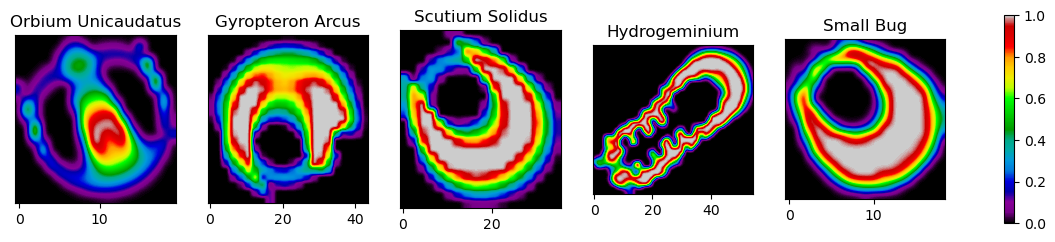

In [29]:
# Import d'espèces particulières

# R=13;k=bump4();d=gaus(0.15,0.017)*0.1
Orbium_unicaudatus = np.load("Orbium_unicaudatus2.npy")

# R=26;k=bump4();d=gaus(0.293,0.0511)*0.1
Gyropteron_arcus = np.load("Gyropteron_arcus.npy")

# R=26;k=bump4();d=gaus(0.29,0.043)*0.1
Scutium_solidus = np.load("Scutium_solidus.npy")

# R=18;k=bump4();d=gaus(0.26,0.036)*0.1
Hydrogeminium = np.array([[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.01,0.02,0.03,0.04,0.04,0.04,0.03,0.02,0,0,0,0,0,0,0,0,0,0], [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.04,0.1,0.16,0.2,0.23,0.25,0.24,0.21,0.18,0.14,0.1,0.07,0.03,0,0,0,0,0,0,0], [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.01,0.09,0.2,0.33,0.44,0.52,0.56,0.58,0.55,0.51,0.44,0.37,0.3,0.23,0.16,0.08,0.01,0,0,0,0,0], [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.13,0.29,0.45,0.6,0.75,0.85,0.9,0.91,0.88,0.82,0.74,0.64,0.55,0.46,0.36,0.25,0.12,0.03,0,0,0,0], [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.14,0.38,0.6,0.78,0.93,1.0,1.0,1.0,1.0,1.0,1.0,0.99,0.89,0.78,0.67,0.56,0.44,0.3,0.15,0.04,0,0,0], [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.08,0.39,0.74,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.98,0.85,0.74,0.62,0.47,0.3,0.14,0.03,0,0], [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.32,0.76,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.88,0.75,0.61,0.45,0.27,0.11,0.01,0], [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.35,0.83,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.88,0.73,0.57,0.38,0.19,0.05,0], [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.99,1.0,1.0,1.0,1.0,0.99,1.0,1.0,1.0,1.0,1.0,1.0,0.85,0.67,0.47,0.27,0.11,0.01], [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.55,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.93,0.83,0.79,0.84,0.88,0.89,0.9,0.93,0.98,1.0,1.0,1.0,1.0,0.98,0.79,0.57,0.34,0.15,0.03], [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.47,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.9,0.72,0.54,0.44,0.48,0.6,0.7,0.76,0.82,0.91,0.99,1.0,1.0,1.0,1.0,0.91,0.67,0.41,0.19,0.05], [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.27,0.99,1.0,1.0,1.0,1.0,0.9,0.71,0.65,0.55,0.38,0.2,0.14,0.21,0.36,0.52,0.64,0.73,0.84,0.95,1.0,1.0,1.0,1.0,1.0,0.78,0.49,0.24,0.07], [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.14,0.63,0.96,1.0,1.0,1.0,0.84,0.17,0,0,0,0,0,0,0,0.13,0.35,0.51,0.64,0.77,0.91,0.99,1.0,1.0,1.0,1.0,0.88,0.58,0.29,0.09], [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.07,0.38,0.72,0.95,1.0,1.0,1.0,0.22,0,0,0,0,0,0,0,0,0,0.11,0.33,0.5,0.67,0.86,0.99,1.0,1.0,1.0,1.0,0.95,0.64,0.33,0.1], [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.32,0.49,0.71,0.93,1.0,1.0,1.0,0.56,0,0,0,0,0,0,0,0,0,0,0,0.1,0.31,0.52,0.79,0.98,1.0,1.0,1.0,1.0,0.98,0.67,0.35,0.11], [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.01,0.6,0.83,0.98,1.0,1.0,0.68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.15,0.38,0.71,0.97,1.0,1.0,1.0,1.0,0.97,0.67,0.35,0.11], [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.51,0.96,1.0,1.0,0.18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.09,0.34,0.68,0.95,1.0,1.0,1.0,1.0,0.91,0.61,0.32,0.1], [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.13,0.56,0.99,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.17,0.45,0.76,0.96,1.0,1.0,1.0,1.0,0.82,0.52,0.26,0.07], [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.33,0.7,0.94,1.0,1.0,0.44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.33,0.68,0.91,0.99,1.0,1.0,1.0,1.0,0.71,0.42,0.19,0.03], [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.53,0.89,1.0,1.0,1.0,0.8,0.43,0.04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.47,0.86,1.0,1.0,1.0,1.0,1.0,0.95,0.58,0.32,0.12,0], [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.77,0.99,1.0,0.97,0.58,0.41,0.33,0.18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.54,0.95,1.0,1.0,1.0,1.0,1.0,0.8,0.44,0.21,0.06,0], [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.39,0.83,1.0,1.0,0.55,0.11,0.05,0.15,0.22,0.06,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.58,0.99,1.0,1.0,1.0,1.0,1.0,0.59,0.29,0.11,0.01,0], [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.04,0.55,0.81,0.86,0.97,1.0,1.0,0.5,0,0,0.01,0.09,0.03,0,0,0,0,0,0,0,0,0,0,0,0,0,0.26,0.78,1.0,1.0,1.0,1.0,1.0,0.66,0.35,0.13,0.03,0,0], [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.33,1.0,1.0,1.0,1.0,1.0,1.0,0.93,0.11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.23,0.73,0.95,1.0,1.0,1.0,1.0,1.0,0.62,0.35,0.12,0,0,0,0], [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.51,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.72,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.56,0.25,0.09,0,0,0,0,0], [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.12,0.38,1.0,1.0,1.0,0.66,0.08,0.55,1.0,1.0,1.0,0.03,0,0,0,0,0,0,0,0,0,0,0,0,0,0.35,1.0,1.0,1.0,1.0,1.0,1.0,0.67,0.12,0,0,0,0,0,0,0], [0,0,0,0,0,0,0,0,0,0,0,0,0.6,1.0,1.0,1.0,1.0,1.0,1.0,0.49,0,0,0.87,1.0,0.88,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1.0,1.0,1.0,1.0,1.0,0.7,0.07,0,0,0,0,0,0,0,0], [0,0,0,0,0,0,0,0,0,0.04,0.21,0.48,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,0,0.04,0.42,0.26,0,0,0,0,0,0,0,0,0,0.12,0.21,0.34,0.58,1.0,1.0,1.0,0.99,0.97,0.99,0.46,0,0,0,0,0,0,0,0,0,0], [0,0,0,0,0,0,0,0,0,0.5,1.0,1.0,1.0,1.0,0.96,0,0.31,1.0,1.0,1.0,0.53,0,0,0,0,0,0,0,0,0.2,0.21,0,0,0,0.27,1.0,1.0,1.0,1.0,1.0,1.0,0.87,0.52,0.01,0,0,0,0,0,0,0,0,0,0,0], [0,0,0,0,0,0,0,0,0.84,1.0,1.0,1.0,1.0,1.0,0,0,0,0.83,1.0,1.0,0.52,0,0,0,0,0,0,0,0.26,0.82,0.59,0.02,0,0,0.46,1.0,1.0,1.0,1.0,1.0,0.9,0.55,0,0,0,0,0,0,0,0,0,0,0,0,0], [0,0,0,0,0,0,0,0.39,0.99,1.0,1.0,1.0,1.0,0.78,0.04,0,0,0,0.93,0.92,0,0,0,0,0,0,0,0,0.69,1.0,1.0,0.36,0,0,1.0,1.0,0.65,0.66,0.97,0.87,0.54,0,0,0,0,0,0,0,0,0,0,0,0,0,0], [0,0,0,0,0.55,0.75,0.59,0.74,1.0,1.0,0,0,0.75,0.71,0.18,0,0,0,0,0,0,0,0,0,0,0.29,0,0,0.45,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.47,0.39,0.71,0.25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], [0,0,0,0,0.69,0.81,0.8,0.92,1.0,0.13,0,0,0.13,0.94,0.58,0,0,0,0,0,0,0,0,0,1.0,1.0,0.34,0,0.04,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], [0,0,0,0,0.63,0.85,0.9,0.98,1.0,0.09,0,0,0.02,1.0,0.64,0,0,0,0,0,0,0,0,0.59,1.0,1.0,0.84,0,0,1.0,1.0,1.0,1.0,1.0,1.0,0.64,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], [0,0,0,0,0.64,0.65,0.67,1.0,1.0,0.21,0.01,0,0.04,0.02,0,0,0,0,0,0,0,0,0,0.69,1.0,1.0,1.0,0.29,0.37,1.0,1.0,0.6,0.63,1.0,0.84,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], [0,0,0,0,0.44,0.73,0.73,0.85,1.0,0.97,0.23,0.05,0,0,0,0,0,0,0,0,0.06,0,0,0,0.97,1.0,1.0,1.0,1.0,1.0,1.0,0.33,0.24,0.67,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], [0,0,0,0.12,0.55,0.9,0.9,1.0,1.0,1.0,0.43,0.04,0,0,0,0,0,0,0,0.31,0.54,0,0,0,0.88,1.0,1.0,1.0,1.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], [0,0,0,0.29,0.71,1.0,1.0,1.0,1.0,0.79,0.28,0,0,0,0,0,0,0,0,0.4,0.77,0.54,0,0,0.87,1.0,1.0,1.0,1.0,1.0,0.31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], [0,0.16,0.27,0.41,0.72,0.99,1.0,1.0,0.82,0.42,0.09,0,0,0,0,0,0,0,0,0.1,0.55,0.58,0.58,0.77,0.99,1.0,1.0,1.0,1.0,0.63,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], [0.31,0.48,0.45,0.46,0.63,0.88,1.0,0.83,0.59,0.28,0.06,0,0,0,0,0,0,0,0,0,0.32,0.7,0.95,1.0,1.0,1.0,1.0,0.7,0.58,0.12,0.04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], [0.23,0.54,0.53,0.48,0.57,0.59,0.65,0.63,0.55,0.35,0.13,0.03,0.02,0.09,0.74,1.0,0.09,0,0,0,0.32,0.86,1.0,1.0,1.0,1.0,0.57,0.44,0.31,0.16,0.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], [0,0.31,0.45,0.31,0.18,0.28,0.39,0.47,0.54,0.5,0.35,0.2,0.16,0.28,0.75,1.0,0.42,0.01,0,0,0.6,1.0,1.0,1.0,1.0,0.51,0.29,0.09,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], [0,0,0,0,0,0.14,0.3,0.4,0.54,0.71,0.74,0.65,0.49,0.35,0.27,0.47,0.6,0.6,0.72,0.98,1.0,1.0,1.0,1.0,0.65,0.33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], [0,0,0,0,0,0.06,0.33,0.53,0.69,0.94,0.99,1.0,0.84,0.41,0.16,0.15,0.96,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.73,0.13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], [0,0,0,0,0,0,0.42,0.86,0.98,0.98,0.99,1.0,0.94,0.63,0.32,0.62,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.65,0.23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], [0,0,0,0,0,0.07,0.62,0.95,1.0,1.0,0.99,0.98,0.99,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.98,0.14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], [0,0,0,0,0,0.03,0.46,0.89,1.0,1.0,0.97,0.83,0.75,0.81,0.94,1.0,1.0,1.0,1.0,0.99,0.03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], [0,0,0,0,0,0,0.14,0.57,0.88,0.93,0.81,0.58,0.45,0.48,0.64,0.86,0.97,0.99,0.99,0.42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], [0,0,0,0,0,0,0,0,0.23,0.45,0.47,0.39,0.29,0.19,0.2,0.46,0.28,0.03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], [0,0,0,0,0,0,0,0,0,0,0.08,0.22,0.24,0.15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], [0,0,0,0,0,0,0,0,0,0,0,0.07,0.22,0.14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

# R=13;k=bump4();d=gaus(0.31,0.048)*0.1
Bug = np.load("Bug.npy")

# Affichage des espèces
figs, axs = plt.subplots(1, 5, figsize=(15, 3))
for ax, data, title in zip(axs, [Orbium_unicaudatus, Gyropteron_arcus, Scutium_solidus, Hydrogeminium, Bug], 
                           ['Orbium Unicaudatus', 'Gyropteron Arcus', 'Scutium Solidus', 'Hydrogeminium', 'Small Bug']):
    im = ax.imshow(data, cmap=CMAP, interpolation='bicubic', vmin=0, vmax=1)
    ax.set_title(title)
    ax.set_yticks([])
cbar = plt.colorbar(im, ax=axs, shrink=0.9) 
plt.show()

##### Fonction de création de la vidéo

In [31]:
def produce_movie(X, evolve, m, s, K_lenia, save_path, mode='normal',
                  num_steps=100, cmap=None, interpolation='bicubic'):
    if len(X.shape) == 2 and cmap is None:
        cmap = 'gray_r'
    
    fig = plt.figure(layout='constrained')
    im = plt.imshow(X, cmap=cmap, interpolation=interpolation, vmin=0, vmax=1)
    plt.axis('off')
    cbar = plt.colorbar(label='Intensité', shrink=0.7)
    cbar.ax.patch.set_alpha(0.5)
    
    title_map = {
        'normal': f"Simulation de Lenia : f(X) - n°{num_file+1}",
        'conv': f"Simulation de Lenia : k * f(X) - n°{num_file+1}",
        'delta': f"Simulation de Lenia : d(k * f(X)) - n°{num_file+1}"
    }
    plt.title(title_map[mode])
    
    n = 10 if num_steps >= 10 else 1

    convolved_images = []
    if mode in ['conv', 'delta']:
        progress_bar_preprocessing = tqdm(total=num_steps, desc="Pré-traitement",
                                          unit=" img", colour='blue', leave=False)
        for _ in range(num_steps):
            grid = evolve(X, m, s, K_lenia)
            convolved_grid = np.clip(sp.signal.convolve2d(grid, K_lenia, mode='same', boundary='wrap'), 0, 1)
            if mode == 'delta':
                convolved_grid = np.clip(evolve(convolved_grid, m, s, K_lenia), 0, 1)
            convolved_images.append(convolved_grid)
            X[:] = grid
            progress_bar_preprocessing.update(1)
        progress_bar_preprocessing.close()

    progress_bar_video = tqdm(total=num_steps, desc="Progression",
                              unit=" img", colour='green', leave=False)
    
    annotations = []
    
    def update(i):
        progress_bar_video.update(1)
        while annotations: # Supprimer les annotations précédentes
            annotation = annotations.pop()
            annotation.remove()
        if mode == 'normal':
            if i == 0:
                return im,
            nonlocal X
            grid = evolve(X, m, s, K_lenia)
            im.set_array(grid)
            X[:] = grid
        else:
            im.set_array(convolved_images[i])
        annotation1 = plt.annotate(f"Image {i+1}/{num_steps}", xy=(0.02, 0.96), xycoords='axes fraction',
                                   path_effects=[path_effects.withStroke(linewidth=1, foreground='black')],
                                   fontsize=8, color='white')
        annotation2 = plt.annotate(f"{(i+1)/FPS} s", xy=(0.02, 0.02), xycoords='axes fraction',
                                   path_effects=[path_effects.withStroke(linewidth=1, foreground='black')],
                                   fontsize=8, color='white')
        annotations.extend([annotation1, annotation2])
        return im,

    ani = animation.FuncAnimation(fig, update, num_steps, interval=50, blit=True)
    ani.save(save_path, writer='pillow', fps=FPS, dpi=DPI)
    progress_bar_video.close()

###### Ancien code de création des vidéos

##### Fonction pour le nommage du fichier

In [34]:
# Nom du fichier

def file_path(name='x', R='x', mu='x', sigma='x', Kernel='x', supp=''):
    file_prefix = "LeniaSimulation"
    file_format = ".gif"
    parameter = f'R{R}mu{mu}sigma{sigma}kernel{Kernel}'
    if supp == '':
        return f"{file_prefix}-{num_file + 1}-{name}-{parameter}{file_format}"
    else:
        return f"{file_prefix}-{num_file + 1}-{supp}{name}-{parameter}{file_format}"

##### Fonctions d'initialisation

In [36]:
# Definition des fonctions d'initialisation

def GaussSpot():
    radius = 36
    y, x = np.ogrid[-N//2:N//2, -M//2:M//2]
    grid = gauss3D(x, y, 0, 0, radius, radius)
    return grid

def PlaceData(data, vert, hor, flip=False): 
    grid = np.zeros((N, M))
    pos_x = M//6 if not hor == 'left' else M-M//6
    pos_y = N//6 if not vert == 'top' else N-N//6
    if flip:
        grid[pos_x:(pos_x + data.shape[1]), pos_y:(pos_y + data.shape[0])] = np.fliplr(data.T)
    else:
        grid[pos_x:(pos_x + data.shape[1]), pos_y:(pos_y + data.shape[0])] = data.T
    return grid

def TwoPLace(data, flip=False):
    grid = PlaceData(data, 'top', 'left', not flip) + PlaceData(data, 'bottom', 'right', flip)
    return grid

def RandomSquare():
    np.random.seed()
    pom = int((N+M)/2 * 0.60)
    grid = np.zeros((N, M))
    pos_x = (N - (N - pom)) // 2
    pos_y = (M - (M - pom)) // 2
    grid[pos_x:pos_x + (N - pom), pos_y:pos_y + (M - pom)] = np.random.rand(N - pom, M - pom)
    return grid

def GaussRing(mu, sigma):
    y, x = np.ogrid[-N//2:N//2, -M//2:M//2]
    k1, k2, k3 = 1/2, 1/3, 1/4 # poids des anneaux
    rings = [k1, k2, k3] # liste des anneaux
    nb_rings = len(rings)
    grid = np.sqrt(x**2 + y**2) / R**2 * nb_rings
    for i in range(nb_rings):
        masque = (grid.astype(int) == i)
        grid += masque * rings[i] * gauss(X%1, mu, sigma)
    grid = grid / np.max(grid)
    return grid

def RandomSquares(mu, sigma, num_squares):
    radius = min(M//2, N//2) * 0.5
    min_size = radius / 5
    max_size = radius / 2
    grid = np.zeros((N, M))
    for _ in range(num_squares):
        size = np.random.uniform(min_size, max_size)
        x_center = np.random.randint(M)
        y_center = np.random.randint(N)
        while ((x_center - M//2)**2 + (y_center - N//2)**2) > radius**2:
            x_center = np.random.randint(M)
            y_center = np.random.randint(N)
        x_start = max(0, int(x_center - size/2))
        y_start = max(0, int(y_center - size/2))
        x_end = min(M, int(x_center + size/2))
        y_end = min(N, int(y_center + size/2))
        grid[y_start:y_end, x_start:x_end] = np.random.rand(y_end - y_start, x_end - x_start)
    return grid

def Gradient():
    x, y = np.meshgrid(np.arange(M), np.arange(N))
    grid = (x + y) / max(N, M) / 2
    return grid

def RandomGrid(N, M):
    grid = np.random.rand(N, M)
    return grid

##### Choix de l'initialisation

> Cellule qui permet de démarrer la simulation.

Choisissez l'initialisation :
  (1) Gaussian Spot
  (2) Orbium Unicaudatus
  (3) Random
  (4) Random Big Square
  (5) Gyropteron Arcus (unworking)
  (6) Scutium Solidus
  (7) Hydrogeminium Natans
  (8) Random with 3rings Kernel
  (9) Multiples Rings Gaussian
  (10) Random Smalls Squares
  (11) Gradient
  (12) Small Bug (unworking)


Entrez votre choix :  10
Combien d'images voulez-vous générer ?  300


Quel affichage voulez-vous ?
  (a) Normal : f(X)
  (b) Somme du Voisinage : k * f(X)
  (c) Delta de la Somme du Voisinage : d(k * f(X))
  (d) Tous


Entrez votre choix :  d


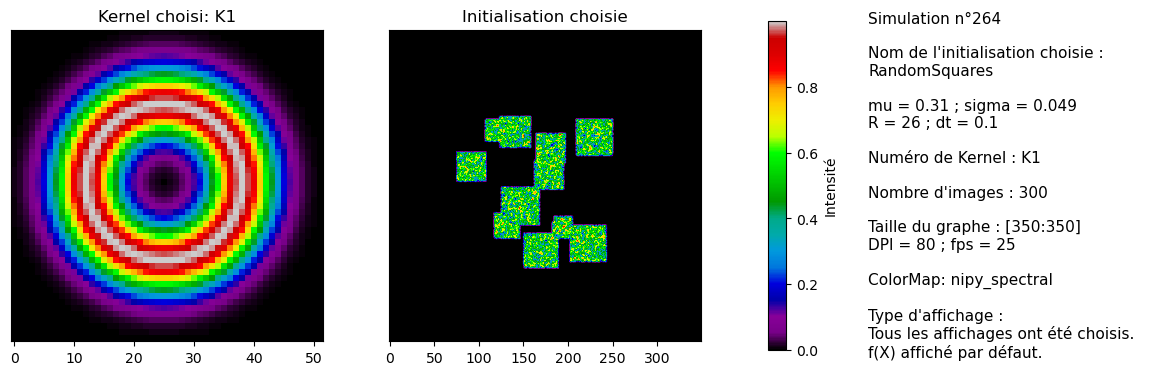


Démarrage de la simulation...
 La simulation risque de durer un moment, vous avez choisi de générer les trois affichages pour la même initialisation.
 Vous pouvez aller vous faire un café en attendant (seulement si vous avez défini un nombre de frame élevé).



Simulation terminé !



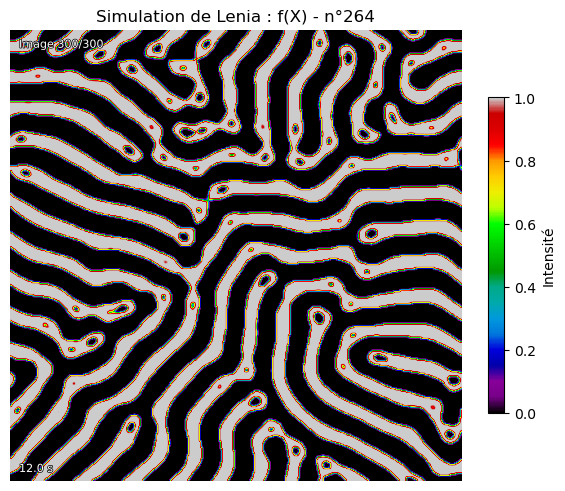

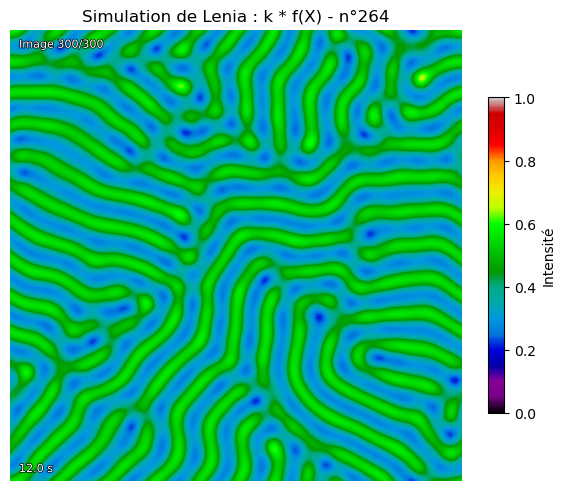

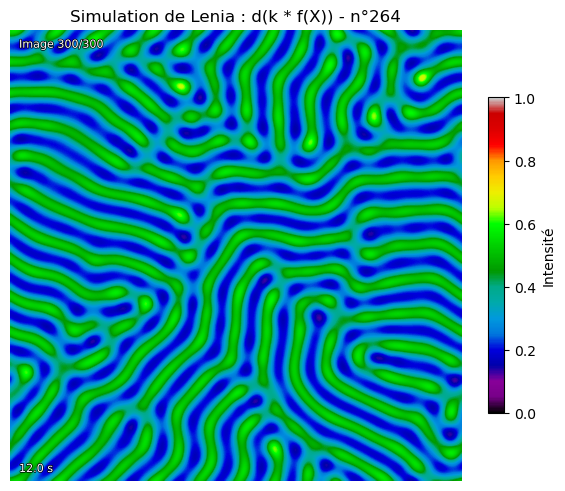

In [45]:
# Choix de l'initialisation

choices = [
    "1. Gaussian Spot",
    "2. Orbium Unicaudatus",
    "3. Random",
    "4. Random Big Square",
    "5. Gyropteron Arcus (unworking)",
    "6. Scutium Solidus",
    "7. Hydrogeminium Natans",
    "8. Random with 3rings Kernel",
    "9. Multiples Rings Gaussian",
    "10. Random Smalls Squares",
    "11. Gradient",
    "12. Small Bug (unworking)"
]

# Affichage des choix d'initialisation
print("Choisissez l'initialisation :")
for choice in choices:
    print(f"  ({choice.split('.')[0]}) {choice.split('. ')[1]}")

# Validation de l'entrée pour le choix d'initialisation
while True:
    choice = input('Entrez votre choix : ')
    if choice == 'stop':
        break
    elif choice in [str(i) for i in range(1, len(choices)+1)]:
        break

    else:
        print(" -> Entrée invalide. Veuillez entrer un nombre entre 1 et 12.")

# Validation de l'entrée pour le nombre d'images
while True:
    try:
        frame = int(input('Combien d\'images voulez-vous générer ? '))
        if frame == 'stop':
            break
        elif frame > 0:
            if frame > 3000: # valeur maximum d'image pour la simulation. A modifier comme bon vous semble
                print(" -> Entrée invalide. Veuillez entrer un nombre moins élevé.")
            else:
                break
        else:
            print(" -> Entrée invalide. Veuillez entrer un nombre strictement positif.")
    except ValueError:
        print(" -> Entrée invalide. Veuillez entrer un nombre entier.")

# Affichage des choix d'affichage
print('Quel affichage voulez-vous ?')
print('  (a) Normal : f(X)')
print('  (b) Somme du Voisinage : k * f(X)')
print('  (c) Delta de la Somme du Voisinage : d(k * f(X))')
print('  (d) Tous')

# Validation de l'entrée pour le choix de convolution
while True:
    choice_conv = input('Entrez votre choix : ')
    if choice_conv == 'stop':
        break
    elif choice_conv in ['a', 'b', 'c','d']:
        break
    else:
        print(" -> Entrée invalide. Veuillez entrer 'a', 'b', 'c' ou 'd'.")

stop = choice == 'stop' or frame == 'stop' or choice_conv == 'stop'
        
print('\n')

# Liste des configurations initiales
config = {
    '1': {'mu': 0.15, 'sigma': 0.017, 'name': 'GaussianSpot', 'R': 26, 'kernel': 1 , 'evolve': evolve_lenia, 'init': lambda: GaussSpot()},
    '2': {'mu': 0.15, 'sigma': 0.017, 'name': 'OrbiumUnicaudatus', 'R': 13, 'kernel': 1 , 'evolve': evolve_lenia, 'init': lambda: TwoPLace(Orbium_unicaudatus)},
    '3': {'mu': 0.15, 'sigma': 0.017, 'name': 'Random', 'R': 26, 'kernel': 1 , 'evolve': evolve_lenia, 'init': lambda: RandomGrid(N, M)},
    '4': {'mu': 0.31, 'sigma': 0.049, 'name': 'RandomSquare', 'R': 26, 'kernel': 1 , 'evolve': evolve_lenia, 'init': lambda: RandomSquare()},
    '5': {'mu': 0.293, 'sigma': 0.0511, 'name': 'GyropteronArcus', 'R': 26, 'kernel': 1 , 'evolve': evolve_lenia, 'init': lambda: PlaceData(Gyropteron_arcus, 'left', 'top', True)},
    '6': {'mu': 0.29, 'sigma': 0.043, 'name': 'ScutiumSolidus', 'R': 26, 'kernel': 1 , 'evolve': evolve_lenia, 'init': lambda: PlaceData(Scutium_solidus, 'left', 'top')},
    '7': {'mu': 0.26, 'sigma': 0.036, 'name': 'HydrogeminiumNatans', 'R': 18, 'kernel': 4 , 'evolve': evolve_hydro, 'init': lambda: PlaceData(Hydrogeminium, 'left', 'top')},
    '8': {'mu': 0.26, 'sigma': 0.036, 'name': 'Random3rings', 'R': 26, 'kernel': 4 , 'evolve': evolve_hydro, 'init': lambda: RandomSquare()},
    '9': {'mu': 0.29, 'sigma': 0.027, 'name': 'MutlipleRings', 'R': 26, 'kernel': 4 , 'evolve': evolve_hydro, 'init': lambda: GaussRing(0.29, 0.043)},
    '10': {'mu': 0.15, 'sigma': 0.017, 'name': 'RandomSquares', 'R': 26, 'kernel': 1 , 'evolve': evolve_lenia, 'init': lambda: RandomSquares(0.15, 0.017, 15)},
    '11': {'mu': 0.1, 'sigma': 0.15, 'name': 'Gradient', 'R': 26, 'kernel': 1 , 'evolve': evolve_lenia, 'init': lambda: Gradient()},
    '12': {'mu': 0.31, 'sigma': 0.048, 'name': 'SmallBug', 'R': 13, 'kernel': 3 , 'evolve': evolve_lenia, 'init': lambda: PlaceData(Bug, 'left', 'top')}
}
if choice in config and not stop: # attitrage des variables
    cfg = config[choice]
    mu, sigma = cfg['mu'], cfg['sigma']
    R = cfg['R']
    name = cfg['name']
    X = cfg['init']()
    k_choice = cfg['kernel']
    K_lenia = Kernel_choice(k_choice)
    evolve_func = cfg['evolve']
    interpolation = 'none' if choice == '4' else 'bicubic'
    
    # Affichage d'une figure avec le kernel l'initialisation et les paramètres de simulation
    fig = plt.figure(figsize=(12, 4))
    gs = fig.add_gridspec(1, 4, width_ratios=[1, 1, 0.06, 1])

    ax0 = fig.add_subplot(gs[0, 0])
    ax1 = fig.add_subplot(gs[0, 1])
    cbar_ax = fig.add_subplot(gs[0, 2])
    ax_info = fig.add_subplot(gs[0, 3])

    im0 = ax0.imshow(K_lenia, cmap=CMAP, interpolation='nearest')
    ax0.set_title(f'Kernel choisi: K{k_choice}')
    ax0.set_yticks([])

    if choice_conv == 'b':
        affichage = 'Convolution : k * f(X)'
        Xs = np.clip(sp.signal.convolve2d(X, K_lenia, mode='full', boundary='wrap'), 0, 1)
    elif choice_conv == 'c':
        affichage = 'Delta : d(k * f(X))'
        Xs = np.clip(evolve_func(sp.signal.convolve2d(X, K_lenia, mode='same', boundary='wrap'), mu, sigma, K_lenia), 0, 1)
    elif choice_conv == 'a':
        affichage = 'Normal : f(X)'
        Xs = X
    elif choice_conv == 'd':
        affichage = 'Tous les affichages ont été choisis.\nf(X) affiché par défaut.'
        Xs = X
    else :
        affichage ='error'
        Xs = X

    im1 = ax1.imshow(Xs, cmap=CMAP, interpolation='bicubic')
    ax1.set_title('Initialisation choisie')
    ax1.set_yticks([])

    cbar = fig.colorbar(im1, cax=cbar_ax, shrink=0.7)
    cbar.ax.set_ylabel('Intensité')

    # Paramètres de simulation (text)
    info_text = (
        f"Simulation n°{num_file + 1}\n\n"
        f"Nom de l'initialisation choisie :\n"
        f"{name}\n \n"
        f"mu = {mu} ; sigma = {sigma}\n"
        f"R = {R} ; dt = {dt}\n \n"
        f"Numéro de Kernel : K{k_choice}\n \n"
        f"Nombre d'images : {frame}\n \n"
        f"Taille du graphe : [{N}:{M}]\n"
        f"DPI = {DPI} ; fps = {FPS}\n \n"
        f"ColorMap: {CMAP}\n\n"
        f"Type d'affichage : \n"
        f"{affichage}"
                )
    
    ax_info.text(0.05, 0.5, info_text, va='center', ha='left', fontsize=11)
    ax_info.axis('off')  # Pour enlever les axes du subplot d'info

    plt.tight_layout()
    plt.show()
    
    print('\nDémarrage de la simulation...')
    
    X1, X2, X3 = np.zeros_like(X), np.zeros_like(X), np.zeros_like(X)
    X1[:], X2[:], X3[:] = X, X, X
    
    # Génération de la vidéo
    if choice_conv == 'a':
        produce_movie(X, evolve_func, mu, sigma, K_lenia, file_path(name, R, mu, sigma, k_choice), mode='normal', num_steps=frame, cmap=CMAP, interpolation=interpolation)
    elif choice_conv == 'b':
        produce_movie(X, evolve_func, mu, sigma, K_lenia, file_path(name, R, mu, sigma, k_choice, 'Conv'), mode='conv', num_steps=frame, cmap=CMAP, interpolation=interpolation)
    elif choice_conv == 'c':
        produce_movie(X, evolve_func, mu, sigma, K_lenia, file_path(name, R, mu, sigma, k_choice, 'Delta'), mode='delta', num_steps=frame, cmap=CMAP, interpolation=interpolation)
    elif choice_conv == 'd':
        print(' La simulation risque de durer un moment, vous avez choisi de générer les trois affichages pour la même initialisation.')
        print(' Vous pouvez aller vous faire un café en attendant (seulement si vous avez défini un nombre de frame élevé).')
        produce_movie(X1, evolve_func, mu, sigma, K_lenia, file_path(name, R, mu, sigma, k_choice), mode='normal', num_steps=frame, cmap=CMAP, interpolation=interpolation)
        produce_movie(X2, evolve_func, mu, sigma, K_lenia, file_path(name, R, mu, sigma, k_choice, 'Conv'), mode='conv', num_steps=frame, cmap=CMAP, interpolation=interpolation)
        produce_movie(X3, evolve_func, mu, sigma, K_lenia, file_path(name, R, mu, sigma, k_choice, 'Delta'), mode='delta', num_steps=frame, cmap=CMAP, interpolation=interpolation)
    else:
        print(" -> Erreur dans lors du choix de l'affichage")
    
    print('\nSimulation terminé !\n')
    
    plt.show()

else:
    print(" -> Erreur dans lors du choix de l'initialisation")

num_file += 1 # Ajout de 1 au numérotage des fichiers

---